# LENDINGCLUB.COM PROJECT (RANDOM FOREST)

**Introduction:** Lending Club connects people who need money (borrowers) with people who have money (investors).

**Objective:** to create a model which predicts borrowers with high probability of paying back.

# Importing the libraries for analysis and visualisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

In [3]:
loans = pd.read_csv('loan_data.csv') #imports the data

In [5]:
loans.head() #checks the first 5 columns

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loans.tail() #checks the last 5 columns

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [7]:
loans.info() #to check the total number of rows, each attribute's type and number of non-null vales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
loans.describe() #to get a summary of the numericalattributes 

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

# Exploratory Data Analysis

Text(0.5, 0, 'FICO')

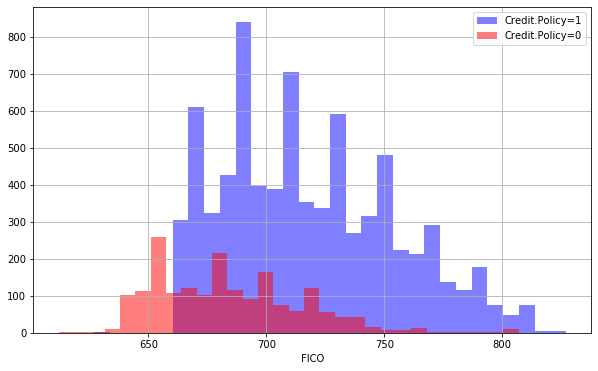

In [10]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

#to create an histogram of FICO distribution and credit policy

Text(0.5, 0, 'FICO')

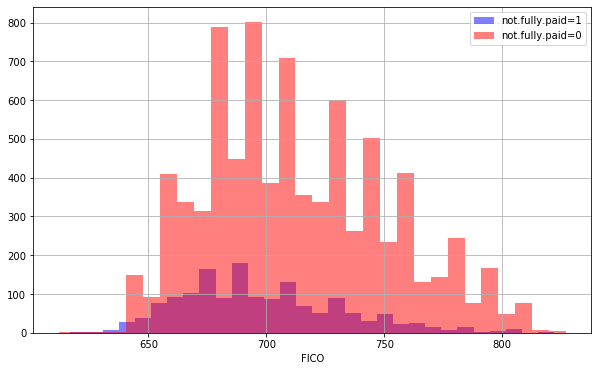

In [11]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

#to create an histogram of FICO distribution and not.fully.paid

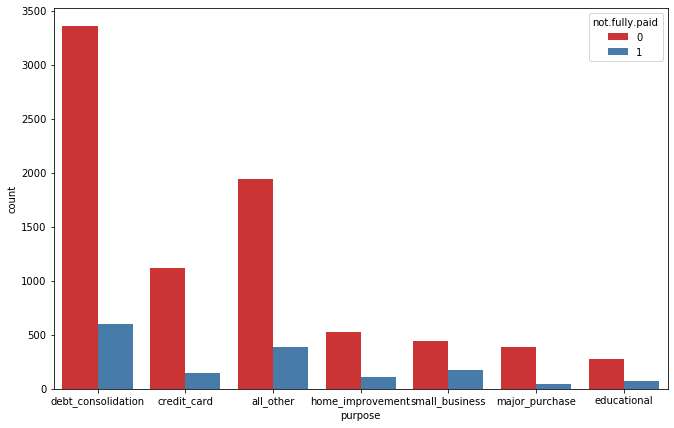

In [12]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

# a countplot to show the counts of loans by purpose with clor hue defined ny not.fully.paid

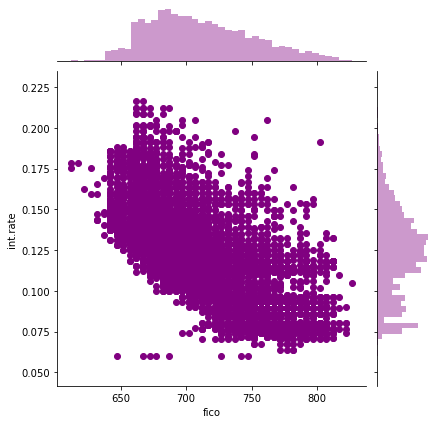

In [13]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

#jointplot to show the trend between FICO score and interest rate.

<Figure size 792x504 with 0 Axes>

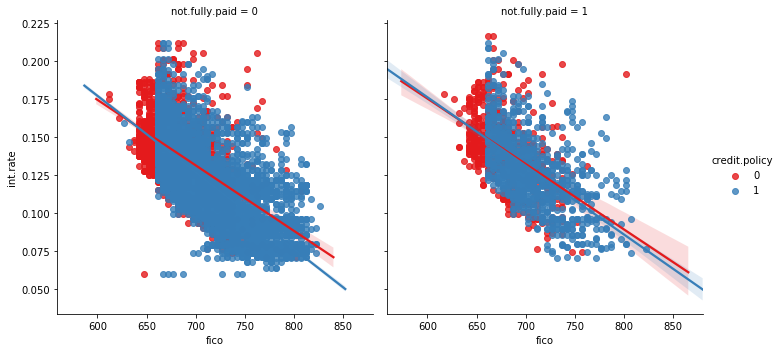

In [14]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# lmplots to see the trend between not.fully.paid and credit policy differed

# Data Cleaning

In [15]:
loans.info() #to check each attribute's type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**Observation:** the purpose column is categorical and needs to be transformed using dummy variables

In [16]:
cat = ['purpose']

In [17]:
data = pd.get_dummies(loans,columns=cat,drop_first=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

# Building the Model

**Splitting into Training and Testing the Data**

In [20]:
data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data.drop('not.fully.paid',axis=1)
y = data['not.fully.paid']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=101)

# **Creating and Training a Decision Tree model**

In [24]:
from sklearn.tree import DecisionTreeClassifier #imports DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()          #Creates an instance of DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)             #fits the instance to the training data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Prediction and Evaluation of Decision Tree**

In [27]:
predictions = dtree.predict(X_test)     #to predict the performance of X_set of data

In [28]:
from sklearn.metrics import classification_report,confusion_matrix     

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [30]:
print(confusion_matrix(y_test,predictions))

[[2002  429]
 [ 337  106]]


**Observation:** 75% accurate

# **Creating and Training the Random Forest model**

In [31]:
from sklearn.ensemble import RandomForestClassifier #imports the RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(n_estimators=600) #creates an instance for RandomForestClassifier with 600 estimators

In [33]:
rfc.fit(X_train,y_train)     #fits the instance to the training data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Prediction and Evaluation of Random Forest**

In [34]:
predictions = rfc.predict(X_test)     #to predict the performance of X_set of data

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.55      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [38]:
print(confusion_matrix(y_test,predictions))

[[2421   10]
 [ 431   12]]


**Observation:** 80% accurate

# Conclusion

Overall, the Random Forest Model did better but the Decision Tree model did better with the recall and f1-score